In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from gensim.models import Word2Vec

In [6]:
df = pd.read_csv('../Data/pcl_test.tsv', sep = '\t',names=['id','info','country', 'text'] )

In [7]:
df.head()

id        info country  \
t_0   @@7258997  vulnerable      us   
t_1  @@16397324       women      pk   
t_2  @@16257812     migrant      ca   
t_3   @@3509652     migrant      gb   
t_4    @@477506  vulnerable      ca   

                                                  text  
t_0  In the meantime , conservatives are working to...  
t_1  In most poor households with no education chil...  
t_2  The real question is not whether immigration i...  
t_3  In total , the country 's immigrant population...  
t_4  Members of the church , which is part of Ken C...

<AxesSubplot:xlabel='class', ylabel='count'>

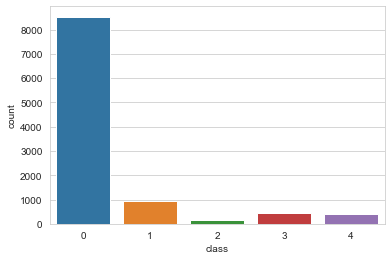

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='class',data= df)

<AxesSubplot:xlabel='info', ylabel='count'>

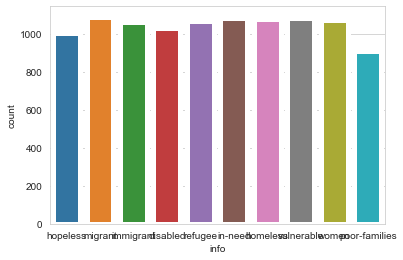

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='info',data= df, linewidth= 5)

<AxesSubplot:xlabel='class', ylabel='count'>

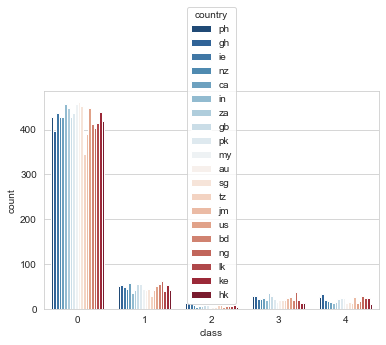

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='class',hue='country',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='class', ylabel='count'>

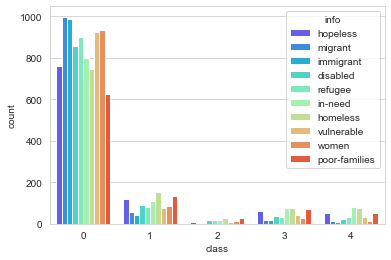

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='class',hue='info',data=df,palette='rainbow')

In [46]:
df['text'].count()

10468

In [47]:
df['info'].count()



10469

In [53]:
df = df.dropna(inplace = False)

In [54]:
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10468 non-null  object
 1   info     10468 non-null  object
 2   country  10468 non-null  object
 3   text     10468 non-null  object
 4   class    10468 non-null  int64 
 5   label    10468 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 490.8+ KB


In [55]:
df['label']= [ 0 if (y == 1 or y == 0) else 1 for y in df['class']]
df

id        info country  \
0      @@24942188    hopeless      ph   
1      @@21968160     migrant      gh   
2      @@16584954   immigrant      ie   
3       @@7811231    disabled      nz   
4       @@1494111     refugee      ca   
...           ...         ...     ...   
10463  @@14297363       women      lk   
10464  @@70091353  vulnerable      ph   
10465  @@20282330     in-need      ng   
10466  @@16753236    hopeless      in   
10467  @@16779383    homeless      ie   

                                                    text  class  label  
0      We 're living in times of absolute insanity , ...      0      0  
1      In Libya today , there are countless number of...      0      0  
2      White House press secretary Sean Spicer said t...      0      0  
3      Council customers only signs would be displaye...      0      0  
4      " Just like we received migrants fleeing El Sa...      0      0  
...                                                  ...    ...    ...  
10463  Sri Lankan norms and culture inhibit women fro...      1      0  
10464  He added that the AFP will continue to bank on...      0      0  
10465  " She has one huge platform , and information ...      3      1  
10466  " Anja Ringgren Loven I ca n't find a word to ...      4      1  
10467  " Guinness World Record of 540lbs of 7-layer m...      3      1  

[10468 rows x 6 columns]

In [56]:
df['label'].value_counts()

0    9475
1     993
Name: label, dtype: int64

In [57]:
df.drop('class', axis=1, inplace= True)
df.head()

id       info country  \
0  @@24942188   hopeless      ph   
1  @@21968160    migrant      gh   
2  @@16584954  immigrant      ie   
3   @@7811231   disabled      nz   
4   @@1494111    refugee      ca   

                                                text  label  
0  We 're living in times of absolute insanity , ...      0  
1  In Libya today , there are countless number of...      0  
2  White House press secretary Sean Spicer said t...      0  
3  Council customers only signs would be displaye...      0  
4  " Just like we received migrants fleeing El Sa...      0

In [58]:
df.label.value_counts()


0    9475
1     993
Name: label, dtype: int64

In [59]:
#df.drop('id',axis =1, inplace = True)

In [84]:
#create independent and Dependent features
columns = df.columns.tolist()
#Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["class", "label","country","info","id"]]
# store the Variable we are predicting
target = "label"
#define Random state
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers =state.uniform(low=0, high=1, size= (X.shape[0], X.shape[1]))

print(X.shape)
print(Y.shape)

(10468, 1)
(10468,)


In [86]:
Y.value_counts()
X

text
0      We 're living in times of absolute insanity , ...
1      In Libya today , there are countless number of...
2      White House press secretary Sean Spicer said t...
3      Council customers only signs would be displaye...
4      " Just like we received migrants fleeing El Sa...
...                                                  ...
10463  Sri Lankan norms and culture inhibit women fro...
10464  He added that the AFP will continue to bank on...
10465  " She has one huge platform , and information ...
10466  " Anja Ringgren Loven I ca n't find a word to ...
10467  " Guinness World Record of 540lbs of 7-layer m...

[10468 rows x 1 columns]

In [61]:
df.isnull().values.any()

False

NameError: name 'LABELS' is not defined

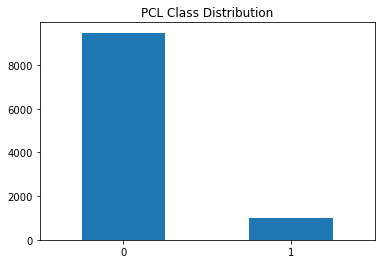

In [62]:
count_classes = pd.value_counts(df['label'], sort = True)
count_classes.plot(kind = 'bar', rot =0)
plt.title ("PCL Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabels("label")
plt.ylabels("frequency")

In [63]:
NPCL = df[df['label']== 0]
PCL = df[df['label']== 1]

In [64]:
print(NPCL.shape, PCL.shape)

(9475, 5) (993, 5)


In [89]:

import tensorflow as tf

In [88]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [90]:
voc_size = 5000


In [92]:
messages = X.copy()
messages.reset_index(inplace= True)

In [93]:
import nltk
import re
from nltk.corpus import stopwords

In [94]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Preetam
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus =[]
from tqdm import tqdm 
for i in tqdm(range(0,10468)):
    
    review = re.sub('[^a-zA-Z]',' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words ('english')]
    review =' '.join(review)
    corpus.append(review)
    

100%|███████████████████████████████████████████████████████████████████████████| 10468/10468 [01:04<00:00, 162.25it/s]


In [72]:
from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss

In [74]:
sm = SMOTE()
X_res, y_res = sm.fit_resample(X,Y)

ValueError: could not convert string to float: '@@24942188'

In [18]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to C:\Users\Preetam
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
import gensim
from gensim.models import Word2Vec

post_text = (df.text.apply(gensim.utils.simple_preprocess))

model = gensim.models.Word2Vec(window = 10, min_count =3, workers=4)
model.build_vocab(post_text, progress_per = 500)
model.train(post_text, total_examples = model.corpus_count, epochs = model.epochs)
print(model.wv.similarity(w1="king", w2 = "queen"))

0.9649264


In [20]:
post_text = [] 
from tqdm import tqdm 
for i in tqdm(range(0,10468)):
    
    review = re.sub('[^a-zA-Z]',' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review =' '.join(review)
    post_text.append(review)


100%|█████████████████████████████████████████████████████████████████████████| 10468/10468 [00:00<00:00, 20958.32it/s]


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


#cv = CountVectorizer( max_features = 1000)
cv = TfidfVectorizer(min_df=1,stop_words='english')
X = cv.fit_transform(post_text).toarray()
y = df.iloc[:,-1].values


In [69]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)
   

y_train_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_train ]
y_test_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_test ]


MemoryError: Unable to allocate 1.79 GiB for an array with shape (8374, 28754) and data type float64

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
model = SVC(class_weight ='balanced')

model.fit(X_train, y_train_task1)
print("model trained")

In [53]:
'''from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes =(30,), max_iter = 2000)
clf.fit(X_train, y_train_task1)
'''

MLPClassifier(hidden_layer_sizes=(30,), max_iter=2000)

In [54]:
#predictions = clf.predict(X_test)
#predictions

array([0, 1, 0, ..., 0, 0, 0])

In [55]:
#score= clf.score(X_test, y_test_task1)
#score

0.8849092645654251

In [56]:
#len(clf.coefs_)


2

In [57]:
#clf.coefs_[0].shape, clf.coefs_[1].shape

((1000, 30), (30, 1))

In [58]:
#clf.intercepts_[0].shape, clf.intercepts_[1].shape

((30,), (1,))

In [59]:
#from sklearn.metrics import confusion_matrix

#accuracy = confusion_matrix(y_test_task1, predictions)
#print(accuracy)


[[1813   77]
 [ 164   40]]


In [60]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test_task1, predictions))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1890
           1       0.34      0.20      0.25       204

    accuracy                           0.88      2094
   macro avg       0.63      0.58      0.59      2094
weighted avg       0.86      0.88      0.87      2094



In [6]:
corpus =[]
from tqdm import tqdm 
for i in tqdm(range(0,10468)):
    
    review = re.sub('[^a-zA-Z]',' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set (all_stopwords)]
    review =' '.join(review)
    corpus.append(review)
    

100%|██████████████████████████████████████████████████████████████████████████| 10468/10468 [00:05<00:00, 1875.59it/s]


In [123]:
#corpus

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#cv = CountVectorizer( max_features = 1000)
cv = TfidfVectorizer(min_df=1,stop_words='english')
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)
y_train_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_train ]
y_test_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_test ] 

In [12]:
from sklearn import svm
from sklearn.svm import SVC
model = SVC()

In [13]:
len(X_train)

8374

In [16]:
len(X_test)

2094

In [17]:
model.fit(X_train, y_train_task1)

SVC()

In [ ]:
model.score(X_test, y_test_task1)

In [98]:
#cv = CountVectorizer( max_features = 1000)
#cv = TfidfVectorizer(min_df=1,stop_words='english')
#X = cv.fit_transform(corpus).toarray()
#y = df.iloc[:,-1].values

In [19]:
'''cf = [i for i in range(50,1000,50)]
ac = []

for i in cf:
    cv = CountVectorizer( max_features = i)
    
    X = cv.fit_transform(corpus).toarray()
    y = df.iloc[:,-1].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)
   
    y_train_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_train ]
    y_test_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_test ]
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit (X_train, y_train_task1)
    
    y_pred = classifier.predict(X_test)
    print(f'feature count {i}, {accuracy_score(y_test_task1, y_pred)}')
    ac.append([i,accuracy_score(y_test_task1, y_pred)])'''
    

"cf = [i for i in range(50,1000,50)]\nac = []\n\nfor i in cf:\n    cv = CountVectorizer( max_features = i)\n    \n    X = cv.fit_transform(corpus).toarray()\n    y = df.iloc[:,-1].values\n    \n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)\n   \n    y_train_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_train ]\n    y_test_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_test ]\n    classifier = LogisticRegression(max_iter=1000)\n    classifier.fit (X_train, y_train_task1)\n    \n    y_pred = classifier.predict(X_test)\n    print(f'feature count {i}, {accuracy_score(y_test_task1, y_pred)}')\n    ac.append([i,accuracy_score(y_test_task1, y_pred)])"

In [105]:
'''from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)
y_train_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_train ]
y_test_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_test ]  


from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000, class_weight= 'balanced')
logmodel.fit(X_train, y_train_task1)
predictions = logmodel.predict(X_test)'''

"from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)\ny_train_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_train ]\ny_test_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_test ]  \n\n\nfrom sklearn.linear_model import LogisticRegression\nlogmodel = LogisticRegression(max_iter=1000, class_weight= 'balanced')\nlogmodel.fit(X_train, y_train_task1)\npredictions = logmodel.predict(X_test)"

In [106]:
'''from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test_task1, predictions)
accuracy'''

'from sklearn.metrics import confusion_matrix\naccuracy = confusion_matrix(y_test_task1, predictions)\naccuracy'

In [107]:
'''from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_task1,predictions)
accuracy'''


'from sklearn.metrics import accuracy_score\naccuracy = accuracy_score(y_test_task1,predictions)\naccuracy'

In [108]:
'''from sklearn.metrics import classification_report
print(classification_report(y_test_task1, predictions))'''

'from sklearn.metrics import classification_report\nprint(classification_report(y_test_task1, predictions))'

In [13]:
X_train.shape

(8374, 1000)

|Models|Description|Precion|Recall|weighted average F1|Accuracy F1|Remark|
|---|---|---|---|---|---|---|
|MultinomialNB|TFIDF Feature|.67|.82|.73|81.6|Highly biased|
|GaussianNB|TFIDF Feature|.70|.69|.69|68.7|partial towards class 0|
|GaussianNB|CV Feature|.75|.21|.30|21.4||
|MultinomialNB|CV Feature|.74|.76|.75|76.2|1. overall accc,pre,re is stable throughout.2.class 2 doesn,t given any weightage|
|Logistic|CV Feature|.87|.89|.88|89|CM matrix 0,0 value very in comparison to other three value|
|Logistic|TFIDF Feature|.87|.90|.86|90|Confusion matrix unevenly distributed|
|Logistic|CV Feature,weighted|.87|.80|.83|.80|cm well distributed|
|Logistic|TFIDF, Weighted|.89|.87|.88|87| Cm Well distributed|
|Logistic|TFIDF, Weighted(W2V)|.89|.88|.88|.88| Cm Well distributed|
|Logistic|CV, Weighted(W2V)|.88|.79|.83|.79| Cm Well distributed|
|SVM|CV,Weighted|.88|.84|.85|84|contribution from both classes|
|SVM|CV,W2V|.87|.83|.85|83| CM well distributed|
|MLP|CV,W2V|.87|.89|.87|89|
|MLP|TFIDF,W2V|.88|.90|.88|90|
|SGD|CV,W2V|.86|.88|.87|88|
|XGBOOST|CV,W2V|.86|.88|.87|88|

In [91]:
df['label']= [ 0 if (y == 1 or y == 0) else 1 for y in df['class']]
df

id        info country  \
0      @@24942188    hopeless      ph   
1      @@21968160     migrant      gh   
2      @@16584954   immigrant      ie   
3       @@7811231    disabled      nz   
4       @@1494111     refugee      ca   
...           ...         ...     ...   
10463  @@14297363       women      lk   
10464  @@70091353  vulnerable      ph   
10465  @@20282330     in-need      ng   
10466  @@16753236    hopeless      in   
10467  @@16779383    homeless      ie   

                                                    text  class  label  
0      We 're living in times of absolute insanity , ...      0      0  
1      In Libya today , there are countless number of...      0      0  
2      White House press secretary Sean Spicer said t...      0      0  
3      Council customers only signs would be displaye...      0      0  
4      " Just like we received migrants fleeing El Sa...      0      0  
...                                                  ...    ...    ...  
10463  Sri Lankan norms and culture inhibit women fro...      1      0  
10464  He added that the AFP will continue to bank on...      0      0  
10465  " She has one huge platform , and information ...      3      1  
10466  " Anja Ringgren Loven I ca n't find a word to ...      4      1  
10467  " Guinness World Record of 540lbs of 7-layer m...      3      1  

[10468 rows x 6 columns]

In [62]:
y_test_task1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


TF- IDF


In [18]:
fp = open("submitt1_Log_CV.csv", 'w')
for idx, i in enumerate(y_test_task1):
    print(f"{idx},{i}", file= fp)
    
fp.close()

In [46]:
df1= pd.read_csv("submitt1.csv")

In [53]:
len(cv.get_feature_names())


950

In [78]:
#X_train.inverse_transform(X_train[0])


Dividing dataset into train and test


In [95]:
#np.array(X_train.iloc[0])

In [90]:
len(X_train)

8374

In [88]:
len(y_train_task1)


8374

In [69]:
X_test[0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [100]:
#weighted array
#wt_array =len(X_train)/(len(set(y_train_task1))*(np.bincount(y_train_task1)))

WORD2VEC

In [101]:
wt_array

array([1.])

In [7]:
import gensim
from gensim.models import Word2Vec

In [8]:
#model = Word2Vec(corpus, min_count = 1)

In [17]:
post_text = df.text.apply(gensim.utils.simple_preprocess)
post_text

0        [we, re, living, in, times, of, absolute, insa...
1        [in, libya, today, there, are, countless, numb...
2        [white, house, press, secretary, sean, spicer,...
3        [council, customers, only, signs, would, be, d...
4        [just, like, we, received, migrants, fleeing, ...
                               ...                        
10463    [sri, lankan, norms, and, culture, inhibit, wo...
10464    [he, added, that, the, afp, will, continue, to...
10465    [she, has, one, huge, platform, and, informati...
10466    [anja, ringgren, loven, ca, find, word, to, de...
10467    [guinness, world, record, of, lbs, of, layer, ...
Name: text, Length: 10468, dtype: object

In [18]:
model = gensim.models.Word2Vec(window = 10, min_count =2, workers=4)

In [19]:
model.build_vocab(post_text, progress_per = 1000)

In [20]:
model.epochs

5

In [21]:
model.corpus_count

10468

In [22]:
model.train(post_text, total_examples = model.corpus_count, epochs = model.epochs)

(1644754, 2178930)

In [23]:
model.wv.most_similar("good")

[('things', 0.9871540069580078),
 ('hope', 0.986229658126831),
 ('god', 0.9844487309455872),
 ('imagine', 0.9840048551559448),
 ('hard', 0.9837113618850708),
 ('else', 0.9832927584648132),
 ('enough', 0.9830045700073242),
 ('seem', 0.9822738766670227),
 ('way', 0.9811321496963501),
 ('why', 0.9809219837188721)]

In [25]:
model.wv.similarity(w1 ="king", w2="queen")

0.9851086

In [28]:
post_text = []
from tqdm import tqdm 
for i in tqdm(range(0,10468)):
    
    review = re.sub('[^a-zA-Z]',' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set (all_stopwords)]
    review =' '.join(review)
    post_text.append(review)

100%|██████████████████████████████████████████████████████████████████████████| 10468/10468 [00:05<00:00, 1774.10it/s]


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer( max_features = 1000)
#cv = TfidfVectorizer(min_df=1,stop_words='english')
X = cv.fit_transform(post_text).toarray()
y = df.iloc[:,-1].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)
y_train_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_train ]
y_test_task1 = [ 0 if (y == 1 or y == 0) else 1 for y in y_test ]

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logmodel = LogisticRegression(max_iter=1000, class_weight='balanced')
logmodel.fit(X_train, y_train_task1)
predictions = logmodel.predict(X_test)

accuracy = confusion_matrix(y_test_task1, predictions)
print(accuracy)

[[1560  330]
 [  95  109]]
